# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**YOUR NAME, YOUR SURNAME**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [5]:
# Libraries for data loading, data manipulation and data visulisation
import numpy as np
import pandas as pd
import seaborn as sns
import datetime
from dateutil.relativedelta import relativedelta
import warnings 

# Libraries for data preparation and model building
import sklearn as sl
import matplotlib.pyplot as plt
from scipy import stats
from scipy.optimize import minimize

# somewhat useful library
from itertools import product

# Setting global constants to ensure notebook results are reproducible
##PARAMETER_CONSTANT = ###

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [6]:
# load the data
pd.set_option('display.max_columns', None)
df = pd.read_csv("C:/Users/lwazi/Downloads/Advanced-Regression-Starter-Data-3036 Predict/Advanced-Regression-Starter-Data/df_train.csv")

In [3]:
#index_col= "time", parse_dates= ["time"]

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [7]:
# look at data statistics
df.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,sp25,0.0,0.0,1036.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.000000,800.0,1002.666667,274.254667,971.333333,269.888000,269.888000,800.0,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,4.000000,139.000000,0.0,3.333333,0.0,sp25,0.0,0.0,1037.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.666667,800.0,1004.333333,274.945000,972.666667,271.728333,271.728333,800.0,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,2.000000,326.000000,0.0,2.666667,0.0,sp25,0.0,0.0,1038.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1005.333333,278.792000,974.000000,278.008667,278.008667,800.0,278.792000,65.666667,278.008667,281.583667,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,2.333333,273.000000,0.0,4.000000,0.0,sp25,0.0,0.0,1037.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1009.000000,285.394000,994.666667,284.899552,284.899552,800.0,285.394000,54.000000,284.899552,283.434104,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,4.333333,260.000000,0.0,3.000000,0.0,sp25,0.0,0.0,1035.000000,0.0,0.0,0.0,0.0,800.0,800.0,1035.333333,800.0,NaN,285.513719,1035.333333,283.015115,283.015115,800.0,285.513719,58.333333,283.015115,284.213167,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


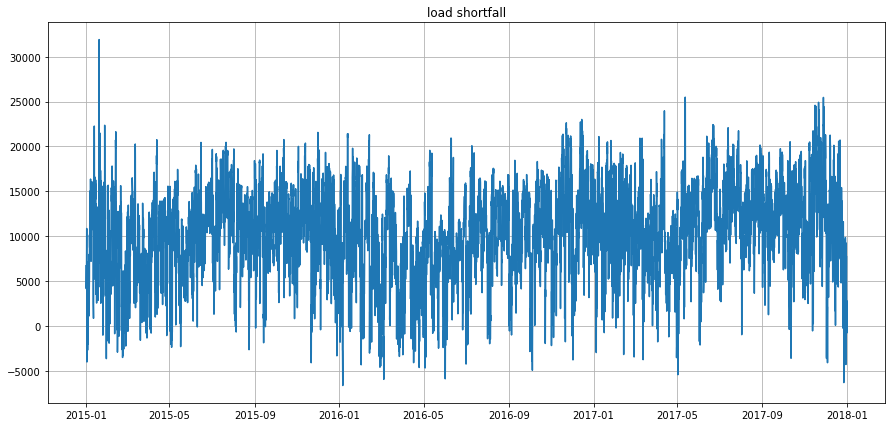

In [3]:
# plot relevant feature interactions
plt.figure(figsize=(15, 7))
plt.plot(df.load_shortfall_3h)
plt.title('load shortfall')
plt.grid(True)
plt.show()



In [7]:
# evaluate correlation
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range (len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr


corr_features = correlation(df,0.78)
len(set(corr_features))

15

In [5]:
corr_features

{'Barcelona_temp',
 'Barcelona_temp_max',
 'Barcelona_temp_min',
 'Bilbao_temp',
 'Bilbao_temp_max',
 'Bilbao_temp_min',
 'Madrid_humidity',
 'Madrid_pressure',
 'Madrid_temp',
 'Madrid_temp_max',
 'Madrid_temp_min',
 'Seville_temp',
 'Seville_temp_min',
 'Valencia_temp',
 'Valencia_temp_max',
 'Valencia_temp_min'}

In [8]:
#drop highly correlated features
df = df.drop(corr_features,axis=1)
df.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Valencia_temp_max,Bilbao_weather_id,Valencia_humidity,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,0.0,1.000000,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,sp25,0.0,0.0,1036.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.000000,800.0,1002.666667,274.254667,269.888000,800.0,75.666667,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,0.0,1.000000,0.0,221.000000,4.000000,139.000000,0.0,3.333333,0.0,sp25,0.0,0.0,1037.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.666667,800.0,1004.333333,274.945000,271.728333,800.0,71.000000,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,0.0,1.000000,0.0,214.333333,2.000000,326.000000,0.0,2.666667,0.0,sp25,0.0,0.0,1038.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1005.333333,278.792000,278.008667,800.0,65.666667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,0.0,1.000000,0.0,199.666667,2.333333,273.000000,0.0,4.000000,0.0,sp25,0.0,0.0,1037.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1009.000000,285.394000,284.899552,800.0,54.000000,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,2.0,0.333333,0.0,185.000000,4.333333,260.000000,0.0,3.000000,0.0,sp25,0.0,0.0,1035.000000,0.0,0.0,0.0,0.0,800.0,800.0,1035.333333,800.0,NaN,285.513719,283.015115,800.0,58.333333,6620.666667


In [9]:
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range (len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr


corr_features = correlation(df,0.78)
len(set(corr_features))

1

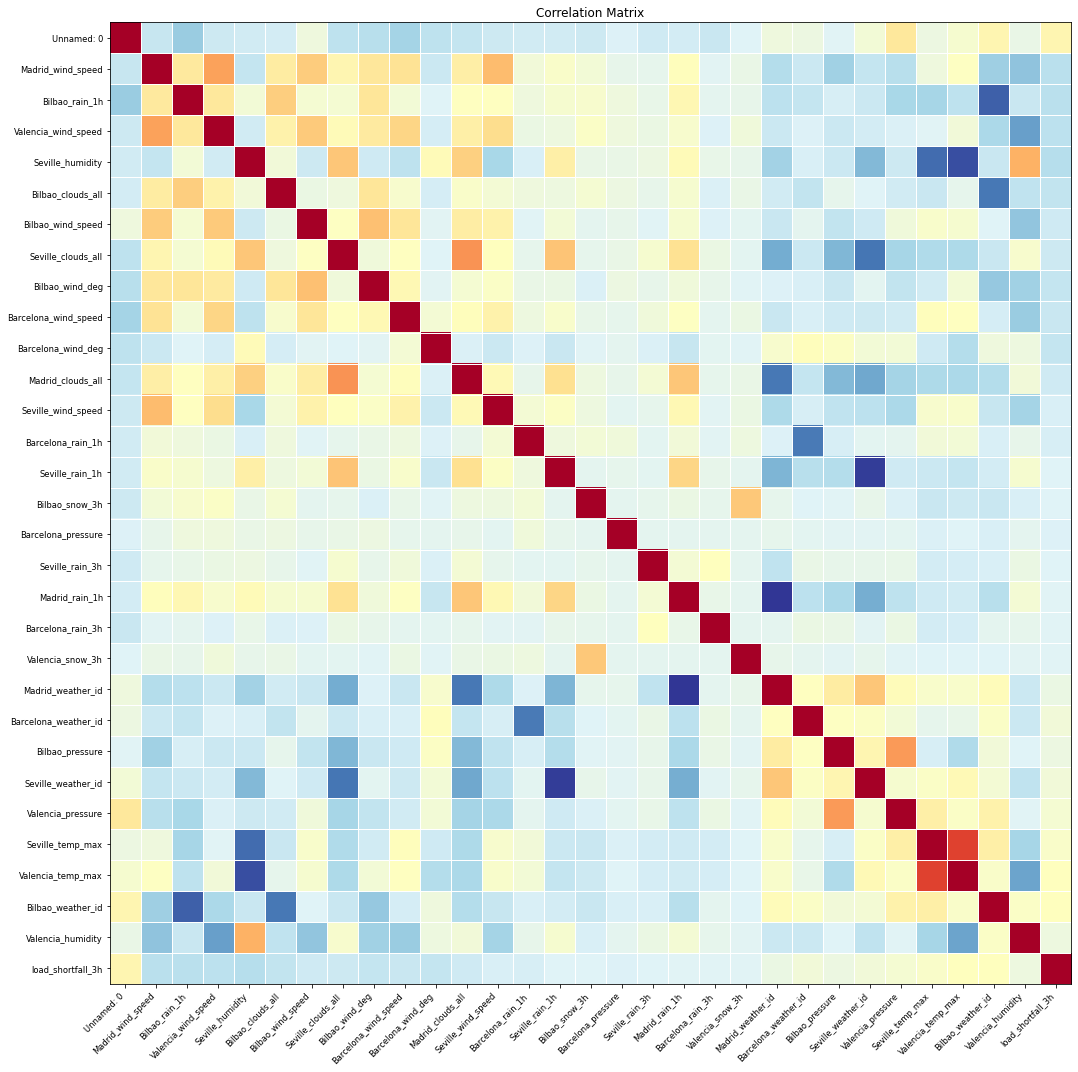

In [10]:
# have a look at feature distribution
from statsmodels.graphics.correlation import plot_corr

fig = plt.figure(figsize=(15,15));
ax = fig.add_subplot(111);
plot_corr(df.corr(), xnames = df.corr().columns, ax = ax);

In [24]:
df.corr()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Bilbao_weather_id,Valencia_humidity,load_shortfall_3h
Madrid_wind_speed,1.000000,0.259719,0.513092,-0.117892,0.244001,0.377854,0.191251,0.270950,0.294640,-0.095380,0.230126,0.434104,0.062758,-0.182792,0.108413,0.071183,0.011134,0.004795,0.150446,-0.014644,0.021660,-0.169358,-0.099582,-0.231747,-0.120014,-0.198631,0.050043,-0.238128,-0.285787,-0.150981
Bilbao_rain_1h,0.259719,1.000000,0.265864,0.069878,0.370733,0.085398,0.081131,0.279350,0.069997,-0.030723,0.135524,0.140101,0.052558,0.067471,0.092984,0.096730,0.052458,0.016392,0.187423,-0.001412,0.008269,-0.147768,-0.120618,-0.054814,-0.095723,-0.224834,-0.210323,-0.604616,-0.103868,-0.152510
Valencia_wind_speed,0.513092,0.265864,1.000000,-0.075227,0.210524,0.386478,0.163675,0.248643,0.347966,-0.066071,0.221887,0.316035,0.031804,-0.065082,0.046085,0.115133,0.050282,0.027637,0.093865,-0.037553,0.058629,-0.099056,-0.037605,-0.096374,-0.069092,-0.082930,-0.024045,-0.201379,-0.413017,-0.142791
Seville_humidity,-0.117892,0.069878,-0.075227,1.000000,0.061680,-0.088180,0.399436,-0.087246,-0.138625,0.164064,0.366602,-0.202449,-0.051022,0.217941,0.227476,0.023556,0.021599,0.034343,0.164019,0.015555,0.007351,-0.228442,-0.050515,-0.099458,-0.328265,-0.049493,-0.566426,-0.105088,0.464012,-0.167290
Bilbao_clouds_all,0.244001,0.370733,0.210524,0.061680,1.000000,0.031915,0.046737,0.280154,0.094019,-0.065120,0.109788,0.075066,0.052913,-0.038859,0.041090,0.080180,0.037506,0.009557,0.089281,-0.041013,0.024339,-0.080837,-0.124169,0.000377,-0.033825,-0.125325,-0.102322,-0.536205,-0.129684,-0.127293
Bilbao_wind_speed,0.377854,0.085398,0.386478,-0.088180,0.031915,1.000000,0.127344,0.417534,0.275317,-0.018225,0.239326,0.213420,-0.026640,-0.115875,0.073080,-0.001642,0.009572,-0.026037,0.088502,-0.038246,-0.008114,-0.101497,-0.003074,-0.122915,-0.086691,0.017863,0.103342,-0.031661,-0.279825,-0.081602
Seville_clouds_all,0.191251,0.081131,0.163675,0.399436,0.046737,0.127344,1.000000,0.053482,0.136591,-0.031373,0.552414,0.144119,0.003590,-0.094748,0.408001,0.001718,0.020264,0.087240,0.295499,0.029194,-0.009782,-0.376157,-0.099166,-0.330575,-0.537924,-0.224108,-0.181783,-0.101888,0.097491,-0.091804
Bilbao_wind_deg,0.270950,0.279350,0.248643,-0.087246,0.280154,0.417534,0.053482,1.000000,0.177393,-0.015481,0.085040,0.120378,0.026187,0.041985,0.030082,-0.041314,0.034220,0.006888,0.057058,0.007202,-0.022680,-0.036532,-0.053839,-0.107361,-0.008937,-0.144920,-0.076038,-0.264719,-0.230583,-0.120800
Barcelona_wind_speed,0.294640,0.069997,0.347966,-0.138625,0.094019,0.275317,0.136591,0.177393,1.000000,0.076376,0.147652,0.212193,0.042136,-0.113567,0.105892,0.015752,0.001280,0.058662,0.130751,-0.001722,0.030336,-0.106432,-0.048004,-0.083399,-0.090902,-0.095032,0.152852,-0.064746,-0.249610,-0.103633
Barcelona_wind_deg,-0.095380,-0.030723,-0.066071,0.164064,-0.065120,-0.018225,-0.031373,-0.015481,0.076376,1.000000,-0.041083,-0.098837,-0.037854,0.199350,-0.101449,-0.023039,-0.001079,-0.043800,-0.112801,-0.011875,-0.021024,0.095456,0.151534,0.123565,0.068195,0.096420,-0.083393,0.049678,0.045277,-0.116133


<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [10]:
round(df.isnull().sum()/df.shape[0]*100, 2)

In [6]:
df['time'] = pd.to_datetime(df['time'])

KeyError: 'time'

In [7]:
# remove missing values/ features
#impute the missing values with the median
df['Valencia_pressure'] = df['Valencia_pressure'].fillna(df['Valencia_pressure'].mode()[0])

KeyError: 'Dates'

In [8]:
#converting Seville pressure to float
#removing the sp in the seville pressure column
df["Seville_pressure"]=df["Seville_pressure"].str.replace("sp", "")
df['Seville_pressure'] = pd.to_numeric(df['Seville_pressure'])
df['Seville_pressure'] = df['Seville_pressure'].map(float)

#drop old column and rename new column
#df.drop(["Seville_pressure"],axis=1,inplace=True)

KeyError: 'time'

In [9]:
df.drop('Valencia_wind_deg',axis='columns', inplace=True) #no way to determine numerical value
df.drop('Unnamed: 0',axis='columns', inplace=True) #removing Unname: 0, as it adds no value
df.head()

In [ ]:
def extract_year(df,col):
    df[col+"_year"]=df[col].dt.year

In [ ]:
def extract_month(df,col):
    df[col+"_month"]=df[col].dt.month

In [ ]:
def extract_day(df,col):
    df[col+"_day"]=df[col].dt.day

In [ ]:
extract_year( df,'time')

In [ ]:
extract_month( df,'time')

In [ ]:
extract_day( df,'time')

In [ ]:
df.head()

In [ ]:
from statsmodels.graphics.correlation import plot_corr

fig = plt.figure(figsize=(15,15));
ax = fig.add_subplot(111);
plot_corr(df.corr(), xnames = df.corr().columns, ax = ax);

In [ ]:
plt.figure(figsize=(12,10))
cor=df.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

In [14]:
#setting new index
#df.set_index("time", inplace= False)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   time                  8763 non-null   datetime64[ns]
 1   Madrid_wind_speed     8763 non-null   float64       
 2   Bilbao_rain_1h        8763 non-null   float64       
 3   Valencia_wind_speed   8763 non-null   float64       
 4   Seville_humidity      8763 non-null   float64       
 5   Bilbao_clouds_all     8763 non-null   float64       
 6   Bilbao_wind_speed     8763 non-null   float64       
 7   Seville_clouds_all    8763 non-null   float64       
 8   Bilbao_wind_deg       8763 non-null   float64       
 9   Barcelona_wind_speed  8763 non-null   float64       
 10  Barcelona_wind_deg    8763 non-null   float64       
 11  Madrid_clouds_all     8763 non-null   float64       
 12  Seville_wind_speed    8763 non-null   float64       
 13  Barcelona_rain_1h 

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [11]:
# split data
from sklearn.model_selection import train_test_split
X = df.drop('load_shortfall_3h', axis=1)
y = df["load_shortfall_3h"] #predictor variable

In [12]:
#import scaler method from sklearn
from sklearn.preprocessing import StandardScaler
# create scaler object
scaler = StandardScaler()
# create scaled version of the predictors (there is no need to scale the response)
X_scaled = scaler.fit_transform(X)
# convert the scaled predictor values into a dataframe
X_standardise = pd.DataFrame(X_scaled,columns=X.columns)
X_standardise.head()
#New_standardised_data
target_column = df["load_shortfall_3h"]
New_standardise = pd.concat([X_standardise,target_column], axis = 1)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [14]:
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt

In [15]:
dtree = DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13, random_state=3)
dtree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13, random_state=3)

In [16]:
pred_train_tree= dtree.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_tree))) #RMSE train
print(r2_score(y_train, pred_train_tree)) #R-Squared train

# Code lines 4 to 6
pred_test_tree= dtree.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_tree))) #RMSE test
print(r2_score(y_test, pred_test_tree)) #R-Squared test

5040.922208780568
0.06311774336660936
5100.089859309697
0.057571906114322835


In [17]:
dtree1 = DecisionTreeRegressor(max_depth=2)
dtree2 = DecisionTreeRegressor(max_depth=5)
dtree1.fit(X_train, y_train)
dtree2.fit(X_train, y_train)

# Code Lines 5 to 6: Predict on training data
tr1 = dtree1.predict(X_train)
tr2 = dtree2.predict(X_train) 

#Code Lines 7 to 8: Predict on testing data
y1 = dtree1.predict(X_test)
y2 = dtree2.predict(X_test)

In [21]:
#decision tree 1
# Print RMSE and R-squared value for regression tree 'dtree1' on training data
print(np.sqrt(mean_squared_error(y_train,tr1))) #RMSE train
print(r2_score(y_train, tr1)) #R-Squared train

# Print RMSE and R-squared value for regression tree 'dtree1' on testing data
print(np.sqrt(mean_squared_error(y_test,y1))) #RMSE test
print(r2_score(y_test, y1)) #R-Squared test

5069.861505324479
0.05232982097705974
5135.7164865309705
0.04435927414324581


In [22]:
#decision tree 2
#Print RMSE and R-squared value for regression tree 'dtree2' on training data
print(np.sqrt(mean_squared_error(y_train,tr2))) #RMSE train data
print(r2_score(y_train, tr2)) #R-Squared train data

#Print RMSE and R-squared value for regression tree 'dtree2' on testing data
print(np.sqrt(mean_squared_error(y_test,y2)))  #RMSE test
print(r2_score(y_test, y2)) #R-Squared test

4821.74348373247
0.14281763517019141
5080.5464791648765
0.06478077575071206


In [23]:
#RF model
model_rf = RandomForestRegressor(n_estimators=5000, oob_score=True, random_state=100)
model_rf.fit(X_train, y_train) 
pred_train_rf= model_rf.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_rf))) #RMSE train
print(r2_score(y_train, pred_train_rf)) #R-Squared train

pred_test_rf = model_rf.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_rf))) #RMSE test
print(r2_score(y_test, pred_test_rf)) #R-Squared test

1617.49620854505
0.903539043117763
4479.960267518876
0.2728217301899135


In [12]:
# create targets and features dataset
#from sklearn.linear_model import LinearRegression


#regressor = LinearRegression(fit_intercept =True)

#regressor.fit(X_train,y_train)


LinearRegression()

In [13]:
# create one or more ML models
#instatiation of an object out of our class
#when "fit_intercept = True" - asking the model to obtain intercept which is value of 'm' and 'b'
#when "fit_intercept = False" - model will obtain only the 'm' value; 'b' will be zero by default
regressor = LinearRegression(fit_intercept =True)
regressor.fit(X_train,y_train)

#print('Linear Model Coefficient (m): ', regressor.coef_)
#print('Linear Model Coefficient (b): ', regressor.intercept_)

Linear Model Coefficient (m):  [-2.69367945e+02 -7.80722502e+02 -9.30929174e+01 -5.82726524e+01
 -3.56590035e+00 -2.61095619e+01  2.30807687e+00 -2.40278244e+00
 -1.49695658e+02 -6.00815460e+00  7.63219780e+00 -2.31000828e+01
 -2.60405764e+02  8.66479926e+02  1.29121975e+02 -1.12397115e-02
 -4.61079398e+04  5.93257820e+02 -3.31270609e+04 -7.68552589e+03
 -1.68284532e+00  2.62749266e+00 -9.30905010e+00  1.09751948e+00
  2.95036930e+01 -8.50763542e+00  9.73630657e-01  2.26386308e+01
  2.09538918e+01]
Linear Model Coefficient (b):  -4469.442574255472


In [14]:
# evaluate one or more ML models
#predicted = regressor.predict(X_test)
#type(predicted)
#print(predicted)

[10054.83917472 12137.17290168 11000.64901793 ... 12735.29767683
 10968.50945945 10359.15569755]


In [15]:
#import statsmodels.api as sml
#from statsmodels import tools

#X_new = tools.add_constant(X)

#regressor_OLS = sml.OLS(endog = y,exog =  X_new).fit()

#regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      load_shortfall_3h   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     35.49
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          2.18e-186
Time:                        15:33:09   Log-Likelihood:                -86956.
No. Observations:                8763   AIC:                         1.740e+05
Df Residuals:                    8733   BIC:                         1.742e+05
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -6490.2810   8353.550     -0.777      0.437   -2.29e+04    9884.646
Madrid_wind_speed     -252.8650     37.914     -6.669      0.000    -327.185    -178.545
Bilbao_rain_1h        -769.9494    185.820     -4.144      0.000   -1134.201    -405.698
Valencia_wind_speed    -83.9167     29.338     -2.860      0.004    -141.425     -26.408
Seville_humidity       -56.7209      3.704    -15.313      0.000     -63.982     -49.460
Bilbao_clouds_all       -3.7080      2.023     -1.833      0.067      -7.673       0.257
Bilbao_wind_speed      -32.9277     39.559     -0.832      0.405    -110.474      44.618
Seville_clouds_all       2.3739      3.040      0.781      0.435      -3.585       8.332
Bilbao_wind_deg         -2.6406      0.629     -4.200      0.000      -3.873      -1.408
Barcelona_wind_speed  -146.7896     33.670     -4.360      0.000    -212.792     -80.788
Barcelona_wind_deg      -5.9656      0.637     -9.366      0.000      -7.214      -4.717
Madrid_clouds_all        7.1353      2.659      2.684      0.007       1.924      12.347
Seville_wind_speed     -22.6833     37.493     -0.605      0.545     -96.178      50.811
Barcelona_rain_1h     -346.5346     99.677     -3.477      0.001    -541.926    -151.143
Seville_rain_1h        865.8888    425.846      2.033      0.042      31.130    1700.647
Bilbao_snow_3h           8.9086    105.339      0.085      0.933    -197.581     215.398
Barcelona_pressure      -0.0067      0.004     -1.787      0.074      -0.014       0.001
Seville_rain_3h      -4.384e+04    1.5e+04     -2.927      0.003   -7.32e+04   -1.45e+04
Madrid_rain_1h         584.2988    512.529      1.140      0.254    -420.379    1588.977
Barcelona_rain_3h    -3.512e+04   1.35e+04     -2.608      0.009   -6.15e+04   -8718.666
Valencia_snow_3h     -5405.8016   4849.305     -1.115      0.265   -1.49e+04    4099.980
Madrid_weather_id       -1.9131      1.086     -1.761      0.078      -4.043       0.217
Barcelona_weather_id     1.9244      0.741      2.598      0.009       0.472       3.377
Bilbao_pressure        -13.2584      6.745     -1.966      0.049     -26.481      -0.036
Seville_weather_id       1.2032      1.143      1.053      0.292      -1.037       3.443
Valencia_pressure       35.6460      7.867      4.531      0.000      20.225      51.067
Seville_temp_max        -7.7375      8.842     -0.875      0.382     -25.070       9.595
Bilbao_weather_id        1.1890      0.646      1.841      0.066      -0.077       2.455
Valencia_humidity       20.0392      3.610      5.552      0.000      12.964      27.115
Seville_pressure        28.5345     10.023      2.847      0.004       8.886      48.183
==============================================================================
Omnibus:                      130.794   Durbin-Watson:             

In [16]:
#from sklearn.metrics import mean_squared_error
#print("MSE",mean_squared_error(y_test,predicted))

MSE 25095906.31163853


In [17]:
#print("RMSE",np.sqrt(mean_squared_error(y_test, predicted)))

RMSE 5009.581450744017


In [18]:
y_test.head()

time
2017-05-10 09:00:00    17533.666667
2016-04-18 15:00:00     4434.000000
2015-06-08 06:00:00    11515.666667
2016-08-18 18:00:00    14179.333333
2017-06-04 15:00:00     6127.000000
Name: load_shortfall_3h, dtype: float64

In [ ]:
#from sklearn.metrics import accuracy_score
#regressor.score(y_test.values.reshape(1, -1), predicted.reshape(-1, 1))

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [ ]:
# Compare model performance

In [13]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [15]:
clf = DecisionTreeClassifier(random_state=0)
iris = load_iris()
cross_val_score(clf, iris.data, iris.target, cv=10)

array([1.        , 0.93333333, 1.        , 0.93333333, 0.93333333,
       0.86666667, 0.93333333, 1.        , 1.        , 1.        ])

In [27]:
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
X = df.drop('load_shortfall_3h', axis=1)
y = df["load_shortfall_3h"] #predictor variable
tscv = TimeSeriesSplit()
print(tscv)
TimeSeriesSplit(max_train_size=None, n_splits=3)
for train_index, test_index in tscv.split(X):
    print (("TRAIN:", train_index, "TEST:", test_index), X_train, X_test = X[train_index], X[test_index])
y_train, y_test = y[train_index], y[test_index]

SyntaxError: positional argument follows keyword argument (<ipython-input-27-b5d2551a644b>, line 9)

In [28]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
tscv = TimeSeriesSplit(n_splits = 4)
rmse = []
for train_index, test_index in tscv.split(cross_validation):
    cv_train, cv_test = cross_validation.iloc[train_index], cross_validation.iloc[test_index]
    
    arma = sm.tsa.ARMA(cv_train, (2,2)).fit(disp=False)
    
    predictions = arma.predict(cv_test.index.values[0], cv_test.index.values[-1])
    true_values = cv_test.values
    rmse.append(sqrt(mean_squared_error(true_values, predictions)))
    
print("RMSE: {}".format(np.mean(rmse)))

NameError: name 'cross_validation' is not defined

In [ ]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic